# <font color=white><center><b>CAR DETECTION</center><br><center>using openCV and VGG16</b></center></font>

# Data Description

## Dataset Overview

The dataset for the car detection project consists of two main components:

1. **CSV File**: Contains metadata about the images and the bounding boxes of cars within them.
    - **File Structure**:
        - **Image_Name**: The name of the image file.
        - **Bounding_Boxes**: The coordinates of the bounding boxes for each car present in the image. This includes:
            - `xmin`: The x-coordinate of the top-left corner of the bounding box.
            - `ymin`: The y-coordinate of the top-left corner of the bounding box.
            - `xmax`: The x-coordinate of the bottom-right corner of the bounding box.
            - `ymax`: The y-coordinate of the bottom-right corner of the bounding box.

2. **Image Files**: The image data is split into two folders:
    - **Training Images**: Used to train the car detection model. This folder contains images for model training, with corresponding labels in the CSV file.
    - **Testing Images**: Used to evaluate the model's performance. These images are used to test the model's predictions but do not contain labels in the CSV file.

## Example CSV File Structure

| Image_Name | xmin | ymin | xmax | ymax |
|------------|------|------|------|------|
| img_001.jpg | 34   | 50   | 200  | 220  |
| img_002.jpg | 45   | 60   | 215  | 240  |
| ...        | ... 

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import random
import warnings

warnings.filterwarnings("ignore")

# Libraries

1. **TensorFlow**: For building and training deep learning models.

2. **Matplotlib**: For visualizing images and bounding boxes.

3. **NumPy**: For numerical operations and array handling.

4. **Pandas**: For data manipulation and CSV file processing.

5. **OpenCV**: For image reading and manipulation.

6. **OS**: For file system operations.

7. **Random**: For generating random selections.

8. **Warnings**: For managing waetection project.


In [2]:
data = pd.read_csv(r"train_solution_bounding_boxes (1).csv")

In [3]:
data.head()

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422


### This code snippet demonstrates the process of loading and visualizing images along with their corresponding bounding boxes for a car detection project.

(380, 676, 3)
(380, 676, 3)
(380, 676, 3)


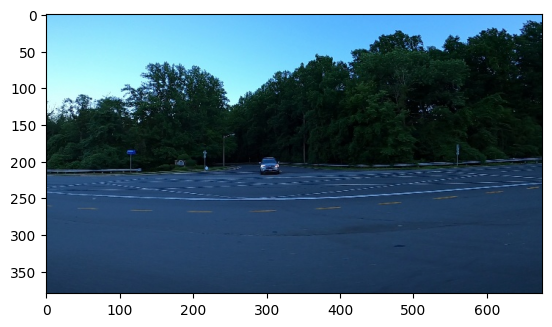

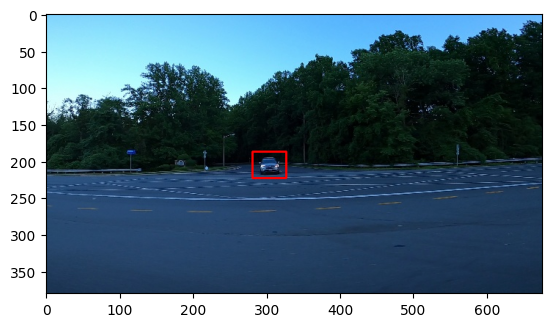

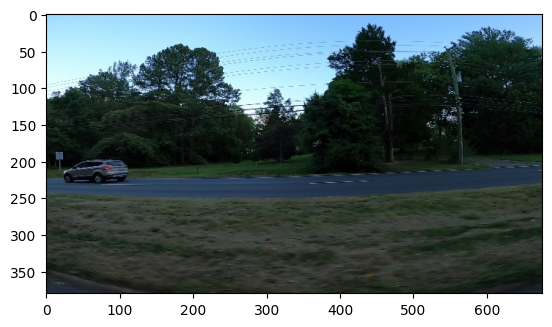

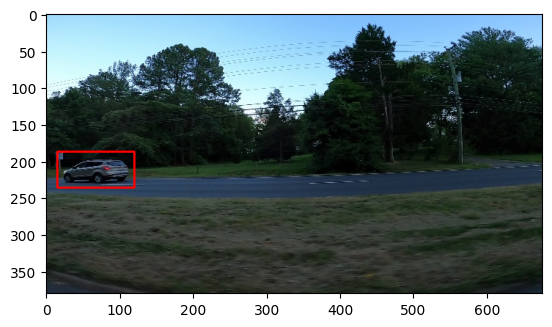

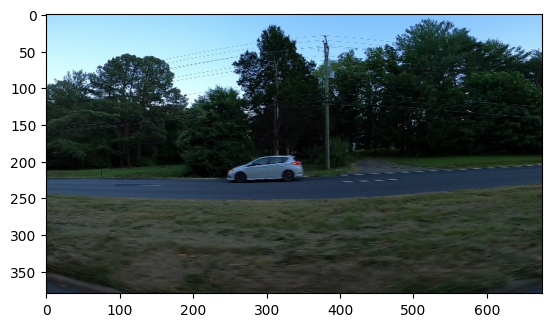

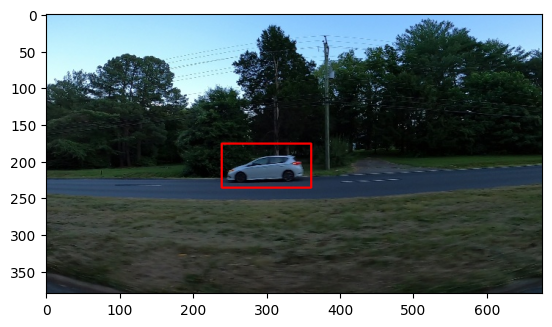

In [4]:
for i, values in enumerate(data.values):
    img = plt.imread(f'training_images\\{values[0]}')
    print(img.shape)
    
    img_1 = img.copy()
    
    plt.figure()
    plt.imshow(img)
    
    xmin = int(values[1])
    ymin = int(values[2])
    xmax = int(values[3])
    ymax = int(values[4])
    
    cv2.rectangle(img_1, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
    
    plt.figure()
    plt.imshow(img_1)

    if i == 2:
        break

### The following code example illustrates how Selective Search is employed to create potential bounding boxes around objects within an image as part of a car detection project.


Shape: (224, 224, 3)
possible bounty boxes: 213


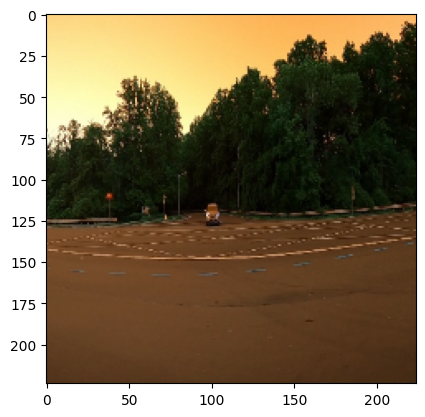

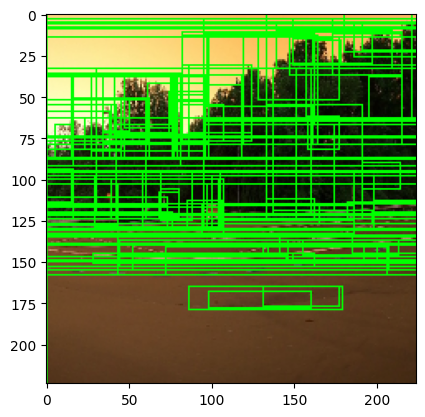

In [6]:
cv2.setUseOptimized(True)
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

img = cv2.imread('training_images\\vid_4_1000.jpg')
img = cv2.resize(img,(224,224))

plt.figure()
plt.imshow(img)

ss.setBaseImage(img)
ss.switchToSelectiveSearchFast()
rects = ss.process()
print('Shape:',img.shape)
print('possible bounty boxes:',len(rects))

for rect in rects:
  x, y, w, h = rect
  imOut = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 1)

plt.figure()
plt.imshow(imOut)

### Calculating Intersection over Union (IoU) for Bounding Boxes


This code snippet defines a function to calculate the Intersection over Union (IoU) between two bounding boxes, a key metric in object detection for evaluating overla

1. **Optimizing OpenCV**:
   - `cv2.setUseOptimized(True)` enables performance optimizations in OpenCV.

2. **Creating Selective Search Object**:
   - A Selective Search segmentation object is initialized, though it's not directly used in this function.

3. **Defining the `get_iou` Function**:
   - The function `get_iou(bb1, bb2)` takes two bounding boxes (dictionaries with `x1`, `y1`, `x2`, `y2` keys) and calculates their IoU.

4. **Bounding Box Validations**:
   - Assertions ensure valid bounding box coordinates.

5. **Calculating Intersection Area**:
   - The intersection coordinates are computed. If there’s no overlap, the function returns `0.0`. Otherwise, the intersection area and areas of both bounding boxes are calculated.

6. **IoU Calculation**:
   - IoU is computed using:
     \[
     \text{IoU} = \frac{\text{Intersection Area}}{\text{Area of } bb1 + \text{Area of } bb2 - \text{Intersection Area}}
     \]

7. **Returning the IoU**:
   - The function returns the IoU value, which ranges from `0.0` to `1.0`, indicating the overlap degree.

This function is crucial for assessing the performance of object detection models.of object detection models.


In [7]:
cv2.setUseOptimized(True)
selective_search = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

def calculate_iou(box1, box2):
    # Ensure the coordinates of both boxes are valid
    assert box1['x1'] < box1['x2']
    assert box1['y1'] < box1['y2']
    
    assert box2['x1'] < box2['x2']
    assert box2['y1'] < box2['y2']
    
    # Calculate the coordinates of the intersection box
    x_intersection_left = max(box1['x1'], box2['x1'])
    y_intersection_top = max(box1['y1'], box2['y1'])
    x_intersection_right = min(box1['x2'], box2['x2'])
    y_intersection_bottom = min(box1['y2'], box2['y2'])
    
    if x_intersection_right < x_intersection_left or y_intersection_bottom < y_intersection_top:
        return 0.0
    
    # Calculate the area of the intersection
    intersection_area = (x_intersection_right - x_intersection_left) * (y_intersection_bottom - y_intersection_top)
    
    # Calculate the area of both bounding boxes
    box1_area = (box1['x2'] - box1['x1']) * (box1['y2'] - box1['y1'])
    box2_area = (box2['x2'] - box2['x1']) * (box2['y2'] - box2['y1'])
    
    # Calculate IoU
    iou_value = intersection_area / float(box1_area + box2_area - intersection_area)
    
    # Ensure the IoU is within the valid range [0.0, 1.0]
    assert 0.0 <= iou_value <= 1.0
    
    return iou_value

# Bounding Box Evaluation

This code processes images to evaluate bounding boxes using Selective Search and calculates the Intersection over Union (IoU).

1. **Initialize Variables**:
   - An empty list `image_liste` is created to store images and labels, along with counters `k`, `l`, and `z`.

2. **Iterate Through Dataset**:
   - For each entry in the dataset, the image name and bounding box coordinates are extracted, creating a dictionary `bb1` for the ground truth box.

3. **Read and Process Images**:
   - The image is read with `cv2.imread()`, and Selective Search is used to generate potential bounding boxes stored in `rects`.

4. **Evaluate Detected Regions**:
   - For each proposed bounding box (`bb2`), the IoU with `bb1` is calculated. If IoU > 0.5, the image is added to `image_liste` with label `1`, else with label `0`.

5. **Error Handling**:
   - Any exceptions during processing are caught and printed.

6. **Progress Tracking**:
   - The variable `z` tracks processed images, printing the image name, `z`, and the count of potential bounding boxes.

This approach filters and stores images based on the overlap of detected and ground truth bounding boxes, aiding in object detection model training.


In [9]:
# list to store images and labels
image_list = []

# Counters for positive, negative samples and progress tracking
positive_count = 0
negative_count = 0
total_images = 0

for values in data.values:
    image_name, xmin, ymin, xmax, ymax = values
    
    # Define ground truth bounding box (bb1)
    ground_truth_bb = {
        'x1': int(xmin),
        'y1': int(ymin),
        'x2': int(xmax),
        'y2': int(ymax)
    }
    
    try:
        img = cv2.imread(f'training_images\\{image_name}')
        
        # Set up selective search on the loaded image
        ss.setBaseImage(img)
        ss.switchToSelectiveSearchFast()
        proposals = ss.process()
        
        # Loop through the bounding boxes(rects)
        for proposal in proposals:
            x, y, w, h = proposal
            proposed_bb = {
                'x1': x,
                'y1': y,
                'x2': x + w,
                'y2': y + h
            }
            
            # Extract the region of interest from the image
            cropped_img = img[proposed_bb['y1']:proposed_bb['y2'], proposed_bb['x1']:proposed_bb['x2']]
            
            resized_img = cv2.resize(cropped_img, (224, 224))
            
            # Calculate IoU and assign labels based on the threshold
            iou = calculate_iou(ground_truth_bb, proposed_bb)
            
            if positive_count < negative_count:
                if iou > 0.5:
                    image_list.append([resized_img, 1])  # Positive sample
                    positive_count += 1
            else:
                if iou > 0.5:
                    image_list.append([resized_img, 1])  # Positive sample
                    positive_count += 1
                else:
                    image_list.append([resized_img, 0])  # Negative sample
                    negative_count += 1
    
    except Exception as error:
        print(f"Error processing {image_name}: {error}")
    
    total_images += 1
    print(f"Processed {image_name}, Total: {total_images}, Proposals: {len(proposals)}")

Processed vid_4_1000.jpg, Total: 1, Proposals: 1101
Processed vid_4_10000.jpg, Total: 2, Proposals: 1456
Processed vid_4_10040.jpg, Total: 3, Proposals: 1403
Processed vid_4_10020.jpg, Total: 4, Proposals: 1489
Processed vid_4_10060.jpg, Total: 5, Proposals: 1315
Processed vid_4_10100.jpg, Total: 6, Proposals: 1537
Processed vid_4_10120.jpg, Total: 7, Proposals: 1430
Processed vid_4_10140.jpg, Total: 8, Proposals: 1544
Processed vid_4_1020.jpg, Total: 9, Proposals: 1117
Processed vid_4_1040.jpg, Total: 10, Proposals: 1146
Processed vid_4_10480.jpg, Total: 11, Proposals: 1663
Processed vid_4_10500.jpg, Total: 12, Proposals: 1815
Processed vid_4_10520.jpg, Total: 13, Proposals: 1725
Processed vid_4_1060.jpg, Total: 14, Proposals: 1251
Processed vid_4_10960.jpg, Total: 15, Proposals: 1894
Processed vid_4_10980.jpg, Total: 16, Proposals: 1676
Processed vid_4_11000.jpg, Total: 17, Proposals: 1754
Processed vid_4_11020.jpg, Total: 18, Proposals: 1553
Processed vid_4_11240.jpg, Total: 19, Pro

In [11]:
len(image_list)

10581

In [12]:
data=[]
data_label=[]

for features, label in image_list:
  data.append(features)
  data_label.append(label)

In [13]:
print('Number of photos:', len(data), '| Number of labels:', len(data_label))

Number of photos: 10581 | Number of labels: 10581


Class: 1
Image size: (224, 224, 3)


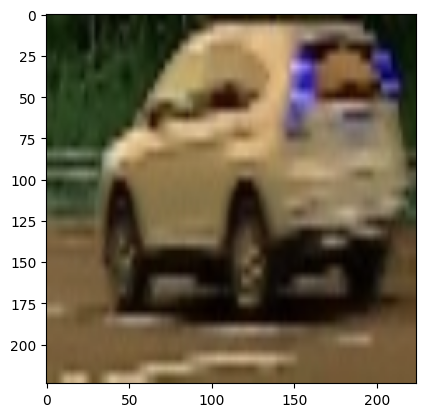

In [15]:
# show a random sample
i=random.randint(1,10580)

print('Class:',data_label[i])
print('Image size:',data[i].shape)
plt.imshow(data[i])

In [16]:
data=np.asarray(data)
data_label=np.asarray(data_label)

In [17]:
print('No car image:', len(data_label[data_label==0]), '| There is a car image:', len(data_label[data_label==1]))

No car image: 5291 | There is a car image: 5290


In [18]:
data.shape

(10581, 224, 224, 3)

In [19]:
data_label.shape

(10581,)

In [20]:
# split the data into training and evaluation set
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(data, data_label, test_size=0.3, random_state=42)

In [21]:
print('x_train shape:', x_train.shape)
print('x_val shape:', x_val.shape)
print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)

x_train shape: (7406, 224, 224, 3)
x_val shape: (3175, 224, 224, 3)
y_train shape: (7406,)
y_val shape: (3175,)


In [22]:
# Initialize the VGG16 model
base_model = tf.keras.applications.VGG16(include_top=False, input_shape=(224,224,3), weights='imagenet')

In [23]:
# Create a Sequential model
model = tf.keras.Sequential()
model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [24]:
# Set the base model (VGG16) to non-trainable, freezing its weights to prevent updates during training. 
base_model.trainable = False

In [25]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, '-', layer.trainable)

0 input_1 - False
1 block1_conv1 - False
2 block1_conv2 - False
3 block1_pool - False
4 block2_conv1 - False
5 block2_conv2 - False
6 block2_pool - False
7 block3_conv1 - False
8 block3_conv2 - False
9 block3_conv3 - False
10 block3_pool - False
11 block4_conv1 - False
12 block4_conv2 - False
13 block4_conv3 - False
14 block4_pool - False
15 block5_conv1 - False
16 block5_conv2 - False
17 block5_conv3 - False
18 block5_pool - False


In [26]:
# compile the model
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics='accuracy')

In [27]:
#training the model
hist = model.fit(x_train, y_train, epochs=10, validation_data=(x_val,y_val))

Epoch 1/20
232/232 [==============================] - 76s 270ms/step - loss: 0.6178 - accuracy: 0.8296 - val_loss: 0.1758 - val_accuracy: 0.9543
Epoch 2/20
232/232 [==============================] - 54s 234ms/step - loss: 0.2589 - accuracy: 0.9307 - val_loss: 0.1468 - val_accuracy: 0.9613
Epoch 3/20
232/232 [==============================] - 54s 234ms/step - loss: 0.1983 - accuracy: 0.9446 - val_loss: 0.1373 - val_accuracy: 0.9672
Epoch 4/20
232/232 [==============================] - 55s 239ms/step - loss: 0.1747 - accuracy: 0.9549 - val_loss: 0.1220 - val_accuracy: 0.9691
Epoch 5/20
232/232 [==============================] - 54s 234ms/step - loss: 0.1580 - accuracy: 0.9538 - val_loss: 0.1140 - val_accuracy: 0.9726
Epoch 6/20
232/232 [==============================] - 56s 240ms/step - loss: 0.1451 - accuracy: 0.9575 - val_loss: 0.1407 - val_accuracy: 0.9682
Epoch 7/20
232/232 [==============================] - 55s 237ms/step - loss: 0.1451 - accuracy: 0.9572 - val_loss: 0.1258 - val_ac

In [28]:
def predict_bounding_box(photo_path, ss, model, iou_threshold=0.5):
    car_detections = []
    
    img = cv2.imread(photo_path)
    
    # Set the image for selective search and process to get proposed regions
    ss.setBaseImage(img)
    ss.switchToSelectiveSearchFast()
    rects = ss.process()
    
    print(f'Number of possible objects in the photo: {len(rects)}')
    
    # Loop through each region proposed by Selective Search
    for rect in rects:
        x, y, w, h = rect
        proposed_bb = {
            'x1': x,
            'y1': y,
            'x2': x + w,
            'y2': y + h
        }
        
        try:
            # Ensure valid bounding box coordinates
            assert proposed_bb['x1'] < proposed_bb['x2']
            assert proposed_bb['y1'] < proposed_bb['y2']
            
            # Extract the region of interest from the image
            img_crop = img[proposed_bb['y1']:proposed_bb['y2'], proposed_bb['x1']:proposed_bb['x2']]
            
            img_resized = cv2.resize(img_crop, (224, 224))
            
            # Reshape and predict the class for the region
            prediction = model.predict(img_resized.reshape(1, 224, 224, 3))
            
            # If the prediction is above the threshold, consider it a car
            if prediction[0] > iou_threshold:
                car_detections.append([proposed_bb, prediction[0]])
        
        except Exception as e:
            print(f"Error processing bounding box: {e}")
    
    print(f'Number of bounding boxes with class estimate of 1: {len(car_detections)}')
    print('-------------------------------------------------------------------------')

    # If we have any valid detections, find the one with the highest score
    if len(car_detections) > 0:
        bounding_boxes = [item[0] for item in car_detections]
        scores = [item[1] for item in car_detections]
        
        # Get the index of the bounding box with the highest score
        best_bb_index = np.argmax(scores)
        best_bb = bounding_boxes[best_bb_index]
        
        # Read the image again for displaying the bounding box
        img_with_bb = cv2.imread(photo_path)
        pt1 = (best_bb['x1'], best_bb['y1'])
        pt2 = (best_bb['x2'], best_bb['y2'])
        
        # Display the original image
        plt.figure()
        plt.imshow(img)
        
        # Draw the bounding box on the image
        cv2.rectangle(img_with_bb, pt1, pt2, (255, 0, 0), 2)
        
        # Display the image with the bounding box and confidence score
        plt.figure()
        plt.title(f'Score: {scores[best_bb_index][0] * 100:.2f}%')
        plt.imshow(img_with_bb)
        plt.show()
    else:
        print("No valid bounding boxes with class prediction 1 found.")

Number of possible objects in the photo: 1986
1/1 [==============================] - 0s 28ms/step
Number of bounding boxes with class estimate of 1: 30
-------------------------------------------------------------------------


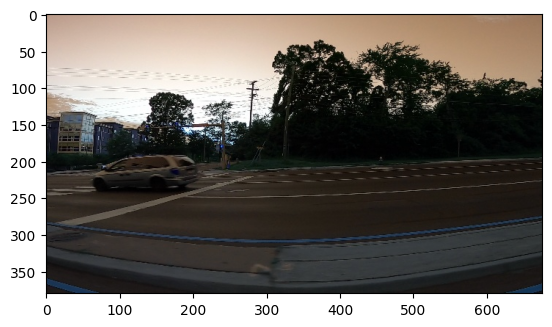

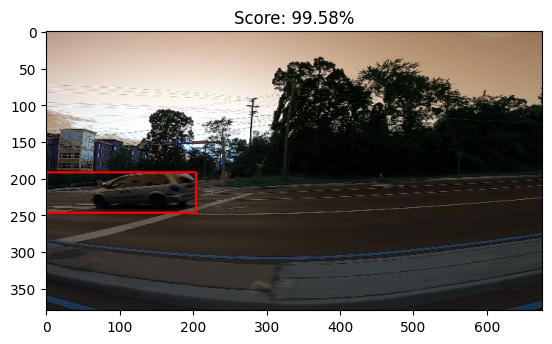

In [31]:
predict_bounding_box('testing_images/vid_5_27500.jpg', selective_search, model, 0.5)